In [1]:
pip install tensorflow opencv-python numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


Found 18000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.
Detected gesture classes: {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19}


C:\Users\91636\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\91636\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7577 - loss: 0.7776

C:\Users\91636\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


563/563 ━━━━━━━━━━━━━━━━━━━━ 243s 427ms/step - accuracy: 0.7579 - loss: 0.7768 - val_accuracy: 0.9985 - val_loss: 0.0073
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9738 - loss: 0.0842 - val_accuracy: 0.9975 - val_loss: 0.0051
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.9875 - loss: 0.0403 - val_accuracy: 0.9988 - val_loss: 0.0039
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.9851 - loss: 0.0415 - val_accuracy: 0.9958 - val_loss: 0.0117
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.9916 - loss: 0.0235 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.9909 - loss: 0.0286 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 64ms/step - accuracy: 0.9928 - loss: 0.0235 - val_accuracy: 0.9992 - val_loss: 0.0059
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accur

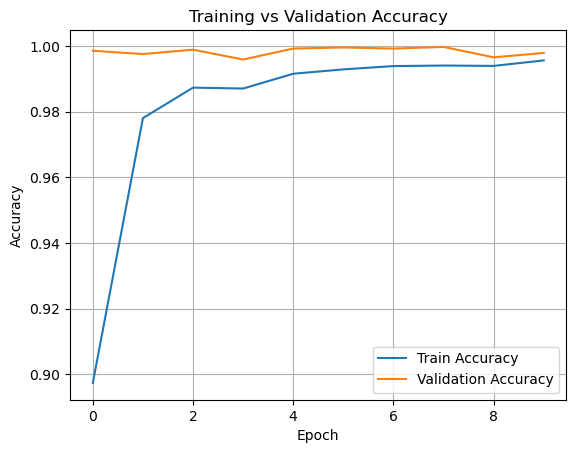

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Dataset paths
train_dir = r"C:\Users\91636\Downloads\handgusture\train\train"
test_dir = r"C:\Users\91636\Downloads\handgusture\test\test"

# Parameters
img_height, img_width = 64, 64
batch_size = 32
epochs = 10

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Number of classes
num_classes = len(train_data.class_indices)
print("Detected gesture classes:", train_data.class_indices)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)

# Evaluate
loss, accuracy = model.evaluate(test_data)
print(f"\n✅ Final Test Accuracy: {accuracy * 100:.2f}%")

# Save model
model.save("hand_gesture_model.keras")
print("✅ Model saved as hand_gesture_model.keras")

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [9]:
pip install opencv-python tensorflow numpy


Note: you may need to restart the kernel to use updated packages.


In [24]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
model = load_model("hand_gesture_model.keras")

# Define class labels
classes = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17',
           '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']

def predict_image(image):
    # Convert to RGB and resize
    image = image.convert('RGB').resize((64, 64))
    image = np.array(image) / 255.0  # Normalize
    image = image.reshape(1, 64, 64, 3)  # 3 channels for RGB

    # Predict gesture
    prediction = model.predict(image)
    class_idx = np.argmax(prediction)
    confidence = np.max(prediction)

    return f"Predicted Gesture: {classes[class_idx]} (Confidence: {confidence*100:.2f}%)"

# Gradio interface
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Hand Gesture Image"),
    outputs="text",
    title="🤚 Hand Gesture Recognition",
    description="Upload an image of your hand gesture. The model will predict the gesture class."
)

# Launch
demo.launch()


* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.


In [1]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load trained model
model = load_model("hand_gesture_model.keras")
classes = ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17',
           '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']

# Prediction function
def predict_image(image):
    if image is None:
        return "No image provided"

    # Convert to RGB, resize, normalize
    image = image.convert('RGB').resize((64, 64))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 64, 64, 3)

    # Predict
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    confidence = np.max(pred)

    return f"Predicted Gesture: {classes[class_idx]} (Confidence: {confidence * 100:.2f}%)"

# Gradio Interface
demo = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Image or Click to Capture"),
    outputs=gr.Text(label="Prediction"),
    title="🤚 Hand Gesture Recognition",
    description="Upload or capture an image of your hand gesture to get the prediction."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
